In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
# df.head()
# print(df)
# df.info()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')

#데이터 정규화(전처리는 NA값이 없어서 진행 안함)
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train -= x_mean
x_train /= x_std
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

# print(x_train[0])
# print(y_train[0])

#시퀸셜 모델을 활용, 딥러닝 네트워크 학습시킴
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), 
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
model.summary()

#그림 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

#validation_split은 훈련데이터에서 일정 비율로 떼서 학습 결과를 검증하기 위한 것
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25)

#위의 코드를 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#일단 회귀 모형을 평가
model.evaluate(x_test, y_test)

#네트워크가 Y값을 얼마나 잘 예측하는지 확인해보기 위해 실제 주택 가격과 예측 주택 가격을 1:1로 비교해봅니다.
pred_Y = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, pred_Y, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])

# y=x에 해당하는 대각선
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

x_train.shape y_train.shape (404, 13) (404,)
Epoch 1/25
10/10 [==============================] - 1s 10ms/step - loss: 0.8789 - val_loss: 1.0756
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5978 - val_loss: 0.8349
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4525 - val_loss: 0.6612
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3486 - val_loss: 0.5528
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2790 - val_loss: 0.4531
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2345 - val_loss: 0.3690
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1959 - val_loss: 0.3025
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1639 - val_loss: 0.2728
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1412 - val_loss: 0.2368
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss:

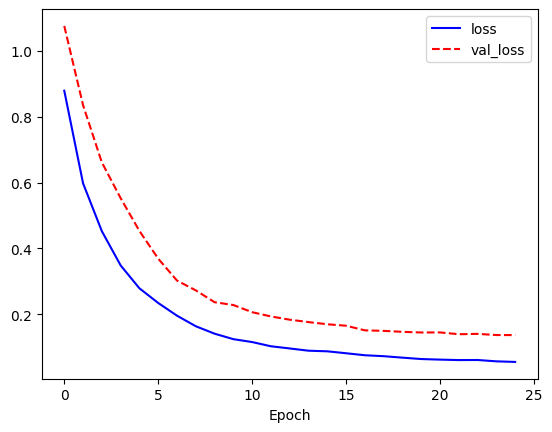

4/4 [==============================] - 0s 1ms/step


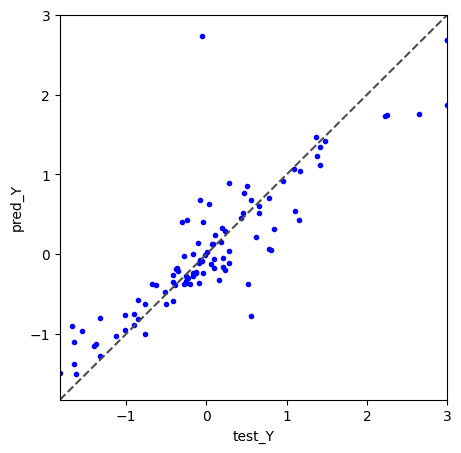

In [12]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)

# sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')

x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train -= x_mean
x_train /= x_std
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

@tf.function
def gradient(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = model(x)
    gradients = tape.gradient(y, x)
    return gradients

history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25)

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

model.evaluate(x_test, y_test)

pred_Y = model.predict(x_test)

plt.figure(figsize=(5, 5))
plt.plot(y_test, pred_Y, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()
